# Part II - Insights before Requesting a Loan
## by (Soad Aljohani)


## Investigation Overview

> Our analysis focused on answering the most asked questions from the borrowers which are how long will it takes to obtain a loan? and what's the annual cost (APR) that could be endured?. In order to answer them we conducted a lot of invistigation from checking the data distribution to the realationships between our target and the other numerical and categorical features. This report will include only the results that provide a clear and siginficent insigts that impact our targets.


## Dataset Overview

> The dataset is a collection of all the requested loans in the previous years. It contains 113,937 loans with 81 variables for each loan, including loan amount, prosper loan rate, borrower APR, current loan status, borrower income, occupation, loan terms, and many others. The last updated of the dataset was 2014. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('cleaned_loans')
#put the required features in order for future use
ProsperRating_order= ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
Term_order = ['12', '36', '60']
#get the defualt color palette for future use
def_color = sns.color_palette()[0]

## how long will it takes to obtain a loan? 

> In general, the loans could be obtained within 2 weeks from the requested day, and it could take 24 days maximum. 

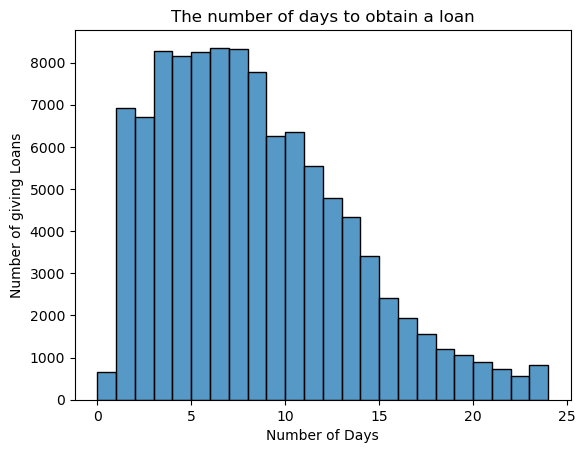

In [3]:
#check the disterbution of LoanObtainingInterval
plt.figure(1)
sns.histplot(loan_df['LoanObtainingInterval'], bins = 24)
plt.title('The number of days to obtain a loan')
plt.xlabel('Number of Days')
plt.ylabel('Number of giving Loans');

## what's the annual cost (APR) that could be endured?

> Most of the borrowers pay between 0.13 and 0.26 as an annual cost of their loans. Also, there are some borrowers who pay more since there are multiple peak at 0.29-0.30 and 0.35-0.36.

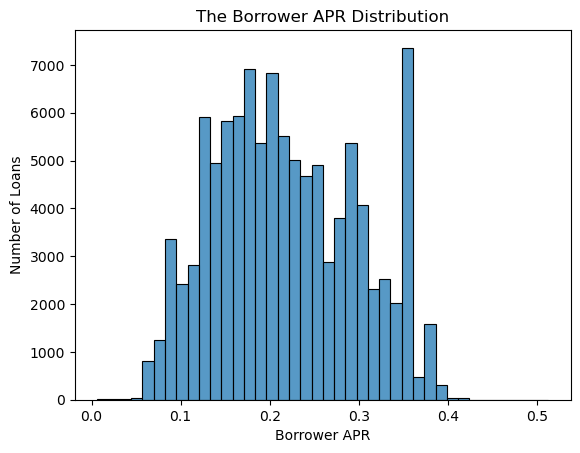

In [4]:
#check the distribution of BorrowerAPR
plt.figure(2)
sns.histplot(loan_df['BorrowerAPR'],bins = 40)
plt.title('The Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('Number of Loans');

### What are the occupations that paid the highest APR and the lowest APR?

Most of the occupations that pay a high APR are those with the lowest salary where the top three are teacher's aid, nurse's aid, and college student. In contrast, the well paid occupations appeared that they are paying the lowest APR which are judge, doctor, and pharmacist.

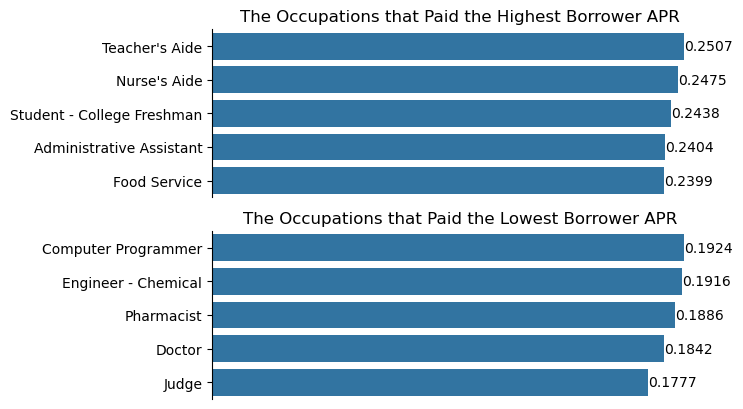

In [5]:
# calculate the mean of APR for each occupation
mean_apr_byjobs = loan_df.groupby('Occupation', as_index=False)['BorrowerAPR'].mean().sort_values(by='BorrowerAPR')

#get the least and top paid APR  
least_paid_apr = mean_apr_byjobs[:5].sort_values(by='BorrowerAPR', ascending=False)
top_paid_apr = mean_apr_byjobs[-5:].sort_values(by='BorrowerAPR', ascending=False)

#create the figure 
plt.figure(3)
plt.subplot(2,1,1)
bar_val = sns.barplot(data=top_paid_apr, x='BorrowerAPR', y='Occupation', color= def_color)
plt.bar_label(bar_val.containers[0], fmt='%.4f') # add the values on bars
sns.despine(bottom=True) # remove the border
plt.xticks([]) # remove x-ticks
plt.xlabel('') # remove x-label
plt.ylabel('') # remove y-label
plt.title('The Occupations that Paid the Highest Borrower APR')
plt.subplot(2,1,2)
bar_val2 = sns.barplot(data=least_paid_apr, x='BorrowerAPR', y='Occupation', color= def_color) 
plt.bar_label(bar_val2.containers[0], fmt='%.4f') # add the vakues on bars
sns.despine(bottom=True) # remove the border
plt.xticks([]) # remove x-ticks
plt.xlabel('') # remove x-label
plt.ylabel('') # remove y-label
plt.title('The Occupations that Paid the Lowest Borrower APR');

### What are the Porpotions of Prosper Ratings for each Occupation?

The chart demonstrated that most of the occupations that pay the lowest APR have prosper ratings with low risks which are AA, A, and B. On other hand, the occupations that pay the highest APR have prosper ratings with high risks which are HR, E, D.

<Figure size 640x480 with 0 Axes>

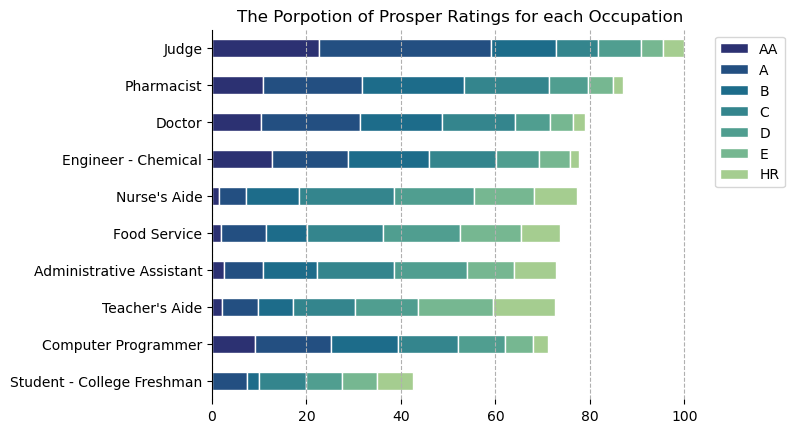

In [6]:
#create 2nd dataframe includes only the occupations of our interest
occupations = ['Judge', 'Doctor','Pharmacist', 'Engineer - Chemical', 'Computer Programmer', 'Teacher\'s Aide', 'Nurse\'s Aide',
           'Student - College Freshman', 'Administrative Assistant', 'Food Service']
loans_df2 = loan_df.query('Occupation in @occupations')

#count the ProsperRating (Alpha) in each occupation
rating_count = loans_df2[['Occupation','ProsperRating (Alpha)']].value_counts()
occupation_count = loans_df2['Occupation'].value_counts()

#calculate the rating proportion in each occupation
Judge_ratingProp = rating_count['Judge']/occupation_count['Judge'] * 100
doctor_ratingProp = rating_count['Doctor']/occupation_count['Doctor'] * 100
Pharmacist_ratingProp = rating_count['Pharmacist']/occupation_count['Pharmacist'] * 100
Engineer_ratingProp = rating_count['Engineer - Chemical']/occupation_count['Engineer - Chemical'] * 100
programmer_ratingProp = rating_count['Computer Programmer']/occupation_count['Computer Programmer'] * 100

teacher_ratingProp = rating_count['Teacher\'s Aide']/occupation_count['Teacher\'s Aide'] * 100
nurse_ratingProp = rating_count['Nurse\'s Aide']/occupation_count['Nurse\'s Aide'] * 100
student_ratingProp = rating_count['Student - College Freshman']/occupation_count['Student - College Freshman'] * 100
adm_ratingProp = rating_count['Administrative Assistant']/occupation_count['Administrative Assistant'] * 100
food_ratingProp = rating_count['Food Service']/occupation_count['Food Service'] * 100

#prepering the data for visiualization
AA_prop = [Judge_ratingProp['AA'],doctor_ratingProp['AA'],Pharmacist_ratingProp['AA'],Engineer_ratingProp['AA']
           ,programmer_ratingProp['AA'],teacher_ratingProp['AA'],nurse_ratingProp['AA'],0.0
           ,adm_ratingProp['AA'],food_ratingProp['AA']]
A_prop = [Judge_ratingProp['A'],doctor_ratingProp['A'],Pharmacist_ratingProp['A'],Engineer_ratingProp['A']
           ,programmer_ratingProp['A'],teacher_ratingProp['A'],nurse_ratingProp['A'],student_ratingProp['A']
           ,adm_ratingProp['A'],food_ratingProp['A']]
B_prop = [Judge_ratingProp['B'],doctor_ratingProp['B'],Pharmacist_ratingProp['B'],Engineer_ratingProp['B']
           ,programmer_ratingProp['B'],teacher_ratingProp['B'],nurse_ratingProp['B'],student_ratingProp['B']
           ,adm_ratingProp['B'],food_ratingProp['B']]
C_prop = [Judge_ratingProp['C'],doctor_ratingProp['C'],Pharmacist_ratingProp['C'],Engineer_ratingProp['C']
           ,programmer_ratingProp['C'],teacher_ratingProp['C'],nurse_ratingProp['C'],student_ratingProp['C']
           ,adm_ratingProp['C'],food_ratingProp['C']]
D_prop = [Judge_ratingProp['D'],doctor_ratingProp['D'],Pharmacist_ratingProp['D'],Engineer_ratingProp['D']
           ,programmer_ratingProp['D'],teacher_ratingProp['D'],nurse_ratingProp['D'],student_ratingProp['D']
           ,adm_ratingProp['D'],food_ratingProp['D']]
E_prop = [Judge_ratingProp['E'],doctor_ratingProp['E'],Pharmacist_ratingProp['E'],Engineer_ratingProp['E']
           ,programmer_ratingProp['E'],teacher_ratingProp['E'],nurse_ratingProp['E'],student_ratingProp['E']
           ,adm_ratingProp['E'],food_ratingProp['E']]
HR_prop = [Judge_ratingProp['HR'],doctor_ratingProp['HR'],Pharmacist_ratingProp['HR'],Engineer_ratingProp['HR']
           ,programmer_ratingProp['HR'],teacher_ratingProp['HR'],nurse_ratingProp['HR'],student_ratingProp['HR']
           ,adm_ratingProp['HR'],food_ratingProp['HR']]

#for the location of the bars
yticks = np.arange(len(AA_prop))

#convert the lists to serieses
Occupation = pd.Series(occupations)
AA = pd.Series(AA_prop)
A = pd.Series(A_prop)
B = pd.Series(B_prop)
C = pd.Series(C_prop)
D = pd.Series(D_prop)
E = pd.Series(E_prop)
HR = pd.Series(HR_prop)

#create the columns from the serieses
Occupation_col = Occupation.to_frame('Occupation')
AA_col = AA.to_frame('AA')
A_col = A.to_frame('A')
B_col = B.to_frame('B')
C_col = C.to_frame('C')
D_col = D.to_frame('D')
E_col = E.to_frame('E')
HR_col = HR.to_frame('HR')

#create rating dataframe
rating_df = pd.concat([Occupation_col, AA_col, A_col, B_col, C_col, D_col, E_col, HR_col], axis=1)
#sorting the data
rating_df['total'] = rating_df[['AA','A','B','C','D','E', 'HR']].sum(axis=1)
rating_df = rating_df.sort_values('total')
#create the visiualization
plt.figure(4)
rating_df[['AA','A','B','C','D','E', 'HR']].plot(kind='barh', stacked=True, colormap="crest_r", edgecolor='w')
plt.yticks(yticks, rating_df['Occupation'])
plt.title('The Porpotion of Prosper Ratings for each Occupation')
plt.grid(axis='x', linestyle='dashed')
plt.legend(loc ='upper left', bbox_to_anchor=(1,1), ncol=1)

sns.despine(bottom=True);

### How do Prosper Ratings and choosing different terms affect the charged Borrower APR?

>The chart confirmed that the borrower APR is highly affected by prosper ratings where having a high risk ratings(HR,E,D) will increase the chareged APR. Otherwise, having a low risk rating (AA, A, B) will decrease the chareged APR. Moreover, choosing different terms affect the chareged APR where AA, A, B, and C are being charged less if they choose shorter loans terms. On the other hand, choosing longer loans terms for C, D, E, and HR will decrease the charged APR.

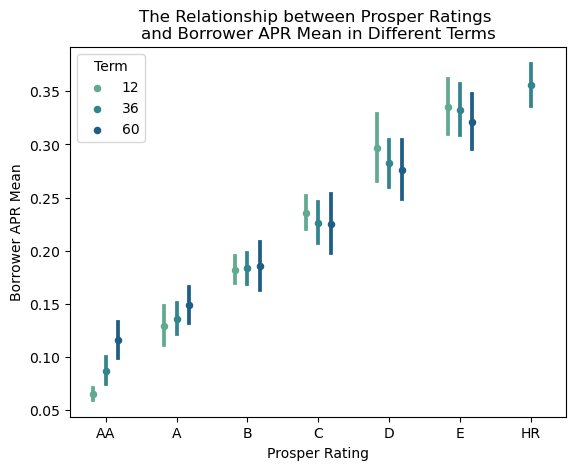

In [7]:
#check the relationship between BorrowerAPR and ProsperRating in different term
plt.figure(5)
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term', markers='.', join=False,
              dodge=0.35, ci='sd', palette='crest', order=ProsperRating_order)
plt.title('The Relationship between Prosper Ratings \nand Borrower APR Mean in Different Terms')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR Mean');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 